# Основы обработки естественного языка

Задание включает в себя следующие пункты: 

1) загрузка и обзор данных;

2) очистка и предварительная обработка текста;

3) удаление пунктуации и пробельных символов;

4) токенизация;

5) удаление стоп-слов;

6) перевод слов в основную форму (стемминг) и/или к словарной форме (лемматизация);

7) посчёт статистики встречаемости слов в тексте;

8) визуализация популярности слов в виде облака. 

Для анализа было выбрано произведение *Шекспира* Гамлет. 

Импортируем инструменты

In [1]:
import string
import re
import nltk

Импортируем данные

In [2]:
with open("hamlet.txt", "r") as source:
    text = source.read()
    
print(text[:403])
print(f"Количество символов в тексте: {len(text)}")

THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.
  Hamlet, son to the former, and nephew to the present king.
  Polonius, Lord Chamberlain.
  Horatio, friend to Hamlet.
  Laertes, son to Polonius.
  Voltemand, courtier.
  Cornelius, courtier.
  Rosencrantz, courtier.
  Guildenstern, courtier.
  Osric, courtier.

Количество символов в тексте: 191726


## 2. Очистка и предварительная обработка текста

Будем считать, что в очистку входит удаление из текста всех символов, кроме букв, цифр и знаков препинания. 

In [3]:
re.sub(
    f"[^{string.punctuation}{string.whitespace}a-zA-Z0-9]", 
    "", 
    """Мы не обрабатываем русский текст, символы вроде таких ♀♂♥♠, но оставляем знаки препинания, цифры 123 and 
    latin alphabet characters and whitespaces
    """)

'    ,    ,    ,  123 and \n    latin alphabet characters and whitespaces\n    '

In [4]:
filtered_text = re.sub(f"[^{string.punctuation}{string.whitespace}a-zA-Z0-9]", "", text)
len(filtered_text)

191726

## 3. Удаление пунктуации и пробельных символов

Решается аналогично предыдущему пункту

In [5]:
re.sub(
    f"[{string.punctuation}{string.whitespace}]", 
    "", 
    """Мы не обрабатываем русский текст, символы вроде таких ♀♂♥♠, но оставляем знаки препинания, цифры 123 and 
    latin alphabet characters and whitespaces
    """)

'Мынеобрабатываемрусскийтекстсимволывродетаких♀♂♥♠нооставляемзнакипрепинанияцифры123andlatinalphabetcharactersandwhitespaces'

In [6]:
text_without_punctuation_and_whitespaces = re.sub(f"[{string.punctuation}{string.whitespace}]", "", filtered_text)
len(text_without_punctuation_and_whitespaces)

130141

## 4. Токенизация

Токенизация (иногда – сегментация) по предложениям – это процесс разделения письменного языка на предложения-компоненты. Идея выглядит довольно простой. В английском и некоторых других языках мы можем вычленять предложение каждый раз, когда находим определенный знак пунктуации – точку.

<a href="https://habr.com/ru/company/Voximplant/blog/446738/">Источник</a>

In [7]:
sentences = nltk.sent_tokenize(filtered_text)
for i in range(20):
    print(f"{i + 1}.", sentences[100 + i])

1. break thee off!
2. Look where it comes again!
3. Ber.
4. In the same figure, like the King that's dead.
5. Mar.
6. Thou art a scholar; speak to it, Horatio.
7. Ber.
8. Looks it not like the King?
9. Mark it, Horatio.
10. Hor.
11. Most like.
12. It harrows me with fear and wonder.
13. Ber.
14. It would be spoke to.
15. Mar.
16. Question it, Horatio.
17. Hor.
18. What art thou that usurp'st this time of night
    Together with that fair and warlike form
    In which the majesty of buried Denmark
    Did sometimes march?
19. By heaven I charge thee speak!
20. Mar.


## 5. Удаление стоп-слов

Стоп-слова – это слова, которые выкидываются из текста до/после обработки текста. Когда мы применяем машинное обучение к текстам, такие слова могут добавить много шума, поэтому необходимо избавляться от нерелевантных слов.

Стоп-слова это обычно понимают артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При этом надо понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая. 

<a href="https://habr.com/ru/company/Voximplant/blog/446738/">Источник</a>

In [8]:
from nltk.corpus import stopwords

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
%%time

text_words = nltk.word_tokenize(filtered_text)
words_list = [word for word in text_words if word not in stopwords.words('english')]

print(
    f"Слов в исходном тексте: {len(text_words)}",
    f"После удаления стоп-слов: {len(words_list)}",
    sep="\n"
)

Слов в исходном тексте: 40614
После удаления стоп-слов: 28361
Wall time: 13.8 s


## 6. Стемминг и лемматизация

In [11]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [12]:
ps = PorterStemmer()
print(ps.stem('grows'), ps.stem('leaves'), ps.stem('fairly'), sep=", ")

grow, leav, fairli


In [13]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('grows', pos='v'), lemma.lemmatize('leaves'), lemma.lemmatize('article'), sep=", ")

grow, leaf, article


## 7. Посчёт статистики встречаемости слов в тексте

In [14]:
from collections import Counter

In [15]:
Counter(words_list).most_common()

[('.', 3082),
 (',', 3001),
 ('I', 603),
 ('?', 452),
 (';', 442),
 ('!', 373),
 ('Ham', 358),
 ("'d", 281),
 ('And', 273),
 ("'s", 235),
 ("'", 214),
 ('lord', 201),
 ('King', 173),
 ('The', 154),
 ('That', 135),
 ('But', 129),
 ('To', 124),
 ('[', 116),
 ('Hamlet', 113),
 ('O', 113),
 (']', 112),
 ('What', 110),
 ('Queen', 109),
 ('Hor', 109),
 ('shall', 109),
 ('A', 92),
 ('thou', 90),
 ('Pol', 86),
 ('thy', 81),
 ('good', 80),
 ('My', 76),
 ("'ll", 75),
 ('You', 74),
 ('For', 74),
 ('like', 74),
 ('As', 73),
 ('know', 73),
 ('us', 72),
 ('Enter', 70),
 ('come', 70),
 ('father', 67),
 ('would', 66),
 ('may', 62),
 ('well', 62),
 ('Laer', 62),
 ('love', 62),
 ('It', 61),
 ('th', 61),
 ('sir', 61),
 ('thee', 59),
 ('How', 58),
 ('Oph', 58),
 ('He', 57),
 ('hath', 57),
 ('let', 57),
 ('must', 56),
 ('man', 55),
 ('Why', 54),
 ('speak', 53),
 ('If', 52),
 ('This', 52),
 ('So', 50),
 ('go', 49),
 ('Let', 48),
 ('much', 47),
 ('say', 47),
 ('Horatio', 46),
 ('Laertes', 45),
 ('make', 45),

## 8. Визуализация популярности слов в виде облака

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

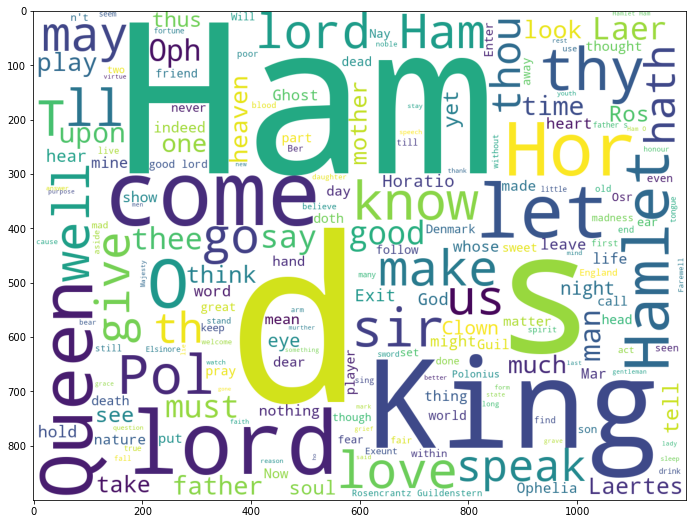

In [17]:
wordcloud = WordCloud(background_color="white", width=1200, height=900, relative_scaling = 1.0).generate(" ".join(words_list))
    
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud)
plt.show()